In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import numpy as np # for working with arrays and carrying out mathematical operations. Pandas is built on Numpy
import re # In-built regular expressions library
import string # Inbuilt string library
import nltk


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud



In [ ]:
spotify = pd.DataFrame(pd.read_excel("/content/drive/MyDrive/Text_Analytics/Assignment 3/Spotify_Tweets.xlsx"))

In [ ]:
Spotify = spotify[['State','Message','Sentiment']]

In [ ]:
Spotify.drop_duplicates(inplace = True)

In [ ]:
Spotify.info

<bound method DataFrame.info of                   State  ... Sentiment
0                 Delhi  ...   NEUTRAL
1                Punjab  ...  POSITIVE
2     Jammu and Kashmir  ...   NEUTRAL
3             Karnataka  ...   NEUTRAL
4                 Delhi  ...   NEUTRAL
...                 ...  ...       ...
9870                NaN  ...   NEUTRAL
9871                NaN  ...   NEUTRAL
9872                NaN  ...   NEUTRAL
9873         Tamil Nadu  ...   NEUTRAL
9874                NaN  ...   NEUTRAL

[9084 rows x 3 columns]>

In [ ]:
Spotify[['State']] = Spotify[['State']].fillna('UnIdentified')

In [ ]:
Spotify.isna().sum()

State        0
Message      0
Sentiment    0
dtype: int64

In [ ]:
Spotify.head(10)

,State,Message,Sentiment
0,Delhi,"whenever i’m at my lowest, i listen to this so...",NEUTRAL
1,Punjab,@bhawmik @mahabharatAudio Have become great fa...,POSITIVE
2,Jammu and Kashmir,yeaaahh let's keep this energy my time 200k,NEUTRAL
3,Karnataka,@KhokhraShrey If you send me YT link & I use s...,NEUTRAL
4,Delhi,Turned a blind eye on Youtube music all this w...,NEUTRAL
5,UnIdentified,how music quality on @instagram sound much bet...,POSITIVE
6,Gujarat,Sachet's Voice over Shahid is simply magical.🎶...,POSITIVE
7,Uttar Pradesh,Looks sick ☠️👀,POSITIVE
8,UnIdentified,Is it just me or anyone else's Spotify glitchi...,NEUTRAL
9,Uttar Pradesh,@Jayecane I followed you Spotify nd soundcloud...,NEUTRAL


## **Distribution of tweets across India**

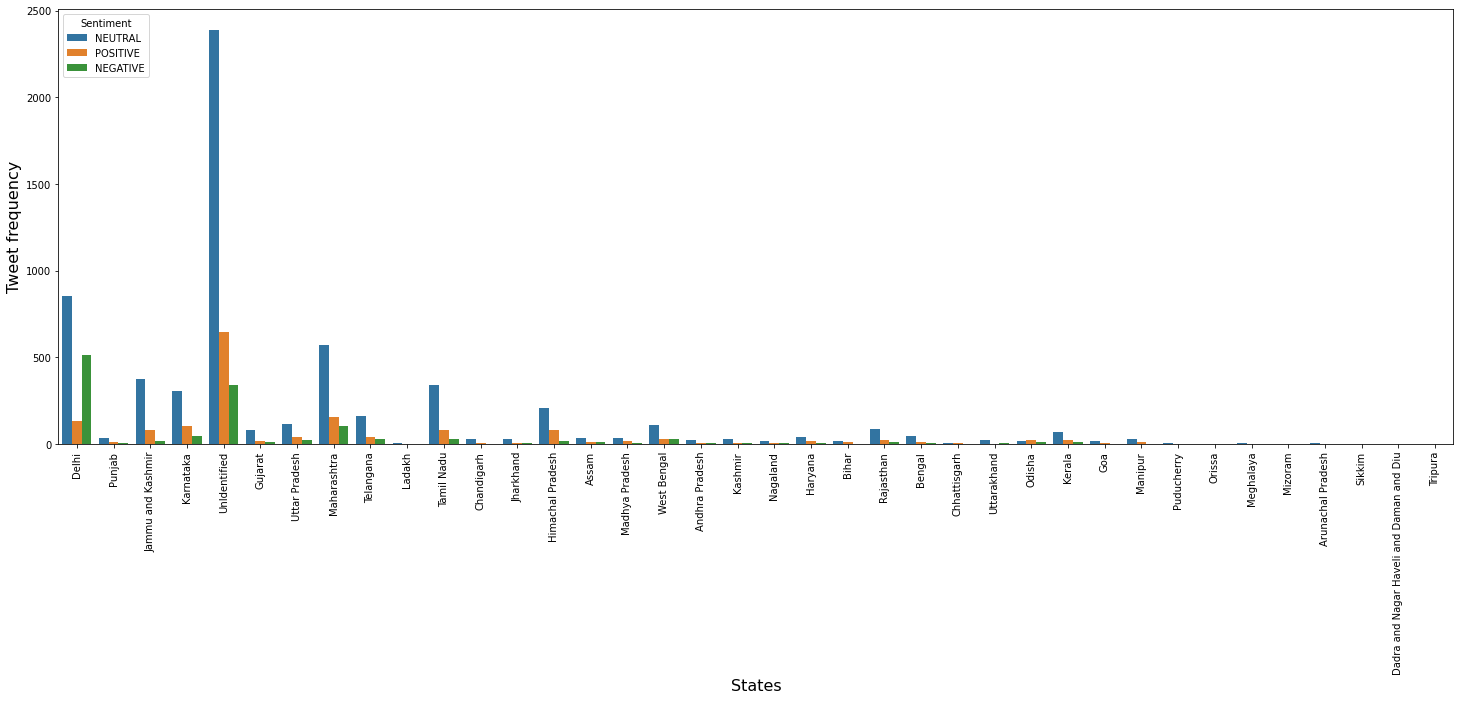

In [ ]:
plt.figure(figsize=(25, 8))
ax = sns.countplot(x='State', hue='Sentiment', data=Spotify)
plt.xticks(rotation=90)
plt.ylabel('Tweet frequency', fontsize=16)
plt.xlabel('States', fontsize=16)
plt.show()

## **Cleansing of Tweets**

In [ ]:
Spotify.Message[6]

"Sachet's Voice over Shahid is simply magical.🎶\n\n@sachet_tandon @shahidkapoor @Spotify @spotifyindia\n\nopen.spotify.com/track/4Xqz9Rb6…"

In [ ]:
from bs4 import BeautifulSoup
Spotify["Cleaned_tweet"] = Spotify['Message']
Spotify['Cleaned_tweet'].apply(lambda Cleaned_tweet: BeautifulSoup(Cleaned_tweet, 'html.parser').get_text())
Spotify["Cleaned_tweet"] = Spotify.Cleaned_tweet.str.lower()
Spotify.head(10)

,State,Message,Sentiment,Cleaned_tweet
0,Delhi,"whenever i’m at my lowest, i listen to this so...",NEUTRAL,"whenever i’m at my lowest, i listen to this so..."
1,Punjab,@bhawmik @mahabharatAudio Have become great fa...,POSITIVE,@bhawmik @mahabharataudio have become great fa...
2,Jammu and Kashmir,yeaaahh let's keep this energy my time 200k,NEUTRAL,yeaaahh let's keep this energy my time 200k
3,Karnataka,@KhokhraShrey If you send me YT link & I use s...,NEUTRAL,@khokhrashrey if you send me yt link & i use s...
4,Delhi,Turned a blind eye on Youtube music all this w...,NEUTRAL,turned a blind eye on youtube music all this w...
5,UnIdentified,how music quality on @instagram sound much bet...,POSITIVE,how music quality on @instagram sound much bet...
6,Gujarat,Sachet's Voice over Shahid is simply magical.🎶...,POSITIVE,sachet's voice over shahid is simply magical.🎶...
7,Uttar Pradesh,Looks sick ☠️👀,POSITIVE,looks sick ☠️👀
8,UnIdentified,Is it just me or anyone else's Spotify glitchi...,NEUTRAL,is it just me or anyone else's spotify glitchi...
9,Uttar Pradesh,@Jayecane I followed you Spotify nd soundcloud...,NEUTRAL,@jayecane i followed you spotify nd soundcloud...


**Remove @ mentions and hyperlinks**

In [ ]:
def clean_raw_data(raw):

    # Remove hyperlinks and markup - <q class="IRsGHoPm">
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    result = re.sub("<>", '', result)
    result = re.sub("_", '', result)
    result = re.sub("bit", '', result)
    result = re.sub("ly", '', result)
    result = re.sub('/', '', result)
    result = re.sub('rt', '', result)
    result = re.sub('pic.twitter.comblnahawy', '', result)
    
    return result

In [ ]:
Spotify["Cleaned_tweet"] = Spotify.Cleaned_tweet.apply(clean_raw_data)

In [ ]:
from nltk.corpus import stopwords,words
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('words')

# Defining my NLTK stop words and my user-defined stop words
stop_words = []
stop_words = list(set(stopwords.words('english')))
user_stop_words = ['Spotify','spotify']

alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets
word_list = words.words()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [ ]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
# Function to remove punctuations, links, and stop words
def preprocessTweets(tweet):
    tweet = tweet.lower()  #has to be in place
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#|\d+', '', tweet)
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)  # convert string to tokens
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w in word_list]

    # Remove punctuations
    unpunctuated_words = [char for char in filtered_words if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)

    return "".join(unpunctuated_words)  # join words with a space in between them


# function to obtain adjectives from tweets
def getAdjectives(tweet):
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [ ]:
import nltk
nltk.download('punkt')
Spotify["Cleaned_tweet"] =  Spotify["Cleaned_tweet"].apply(preprocessTweets)
Spotify["Cleaned_tweet"] =  Spotify["Cleaned_tweet"].apply(remove_emoji)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(Spotify.Cleaned_tweet[6])
print(Spotify.Message[6])

sachet voice simp
Sachet's Voice over Shahid is simply magical.🎶

@sachet_tandon @shahidkapoor @Spotify @spotifyindia

open.spotify.com/track/4Xqz9Rb6…


In [ ]:
import nltk
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')
Spotify["Tweets_Adjectives"] = Spotify['Cleaned_tweet'].apply(getAdjectives)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

# function to return words to their base form using Lemmatizer
def preprocessTweetsSentiments(tweet):
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [ ]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = Spotify['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [ ]:
neg_tweets = Spotify[Spotify.Sentiment == 'NEGATIVE']
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(preprocessTweets)
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(remove_emoji)
neg_tweets["Tweets_Adjectives"] =  neg_tweets["Tweets_Adjectives"].apply(clean_raw_data)
neg_string = []
for t in neg_tweets.Tweets_Adjectives:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

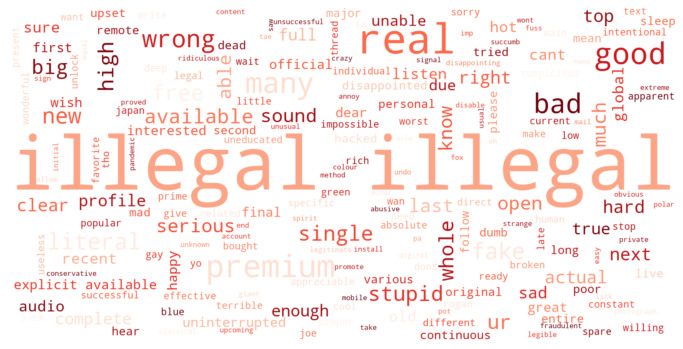

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,
                      colormap='Reds',background_color ='white').generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
pos_tweets = Spotify[Spotify.Sentiment == 'POSITIVE']
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(preprocessTweets)
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(remove_emoji)
pos_tweets["Tweets_Adjectives"] =  pos_tweets["Tweets_Adjectives"].apply(clean_raw_data)

pos_string = []
for t in pos_tweets.Tweets_Adjectives:
    pos_string.append(t)
pos_string = pd.Series(pos_string).str.cat(sep=' ')

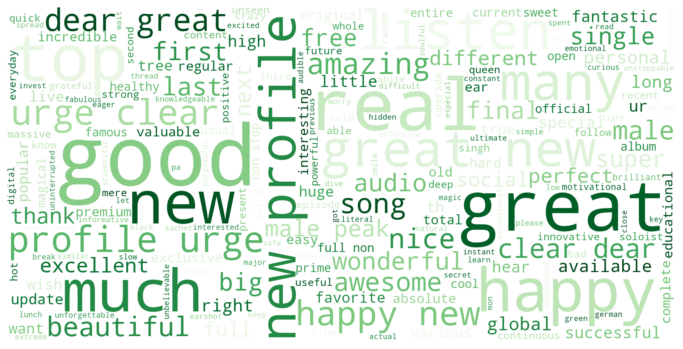

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='Greens',background_color ='white').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
neu_tweets = Spotify[Spotify.Sentiment == 'NEUTRAL']
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(preprocessTweets)
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(remove_emoji)
neu_tweets["Tweets_Adjectives"] =  neu_tweets["Tweets_Adjectives"].apply(clean_raw_data)
neu_string = []
for t in neu_tweets.Cleaned_tweet:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')

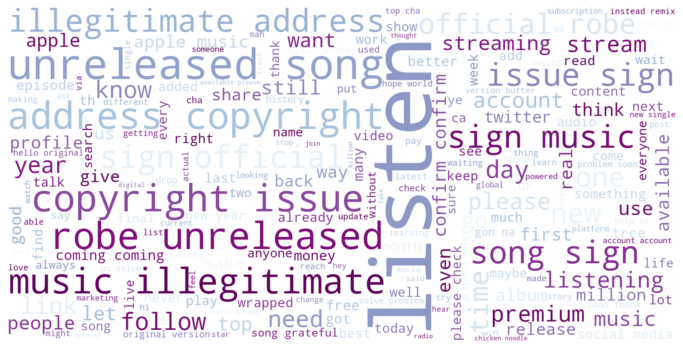

In [ ]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='BuPu',background_color ='white').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

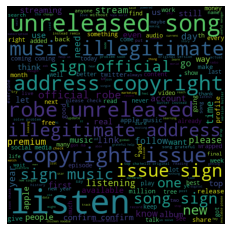

In [ ]:
from PIL import Image
cmask = np.array(Image.open("/content/drive/MyDrive/Text_Analytics/Assignment 3/spotifyimage.png"))
mwc = WordCloud(mask=cmask)
mwc.generate(neu_string)
plt.imshow(mwc)
plt.axis('off')
plt.show()

## **Creating n - grams for analysis**

In [ ]:
# natural language processing: n-gram ranking
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['spotify']

import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('wordnet')
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


**Positive Tweets**

In [ ]:
Pos_words = basic_clean(''.join(str(pos_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Pos_words, 2)).value_counts())[:10]

(star, star)          141
(king, king)           57
(spending, year)       52
(year, long)           50
(company, year)        50
(keeping, company)     50
(thank, keeping)       50
(new, year)            35
(thank, spending)      31
(new, profile)         26
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Pos_words, 3)).value_counts())[:20]

(star, star, star)                 128
(king, king, king)                  51
(thank, keeping, company)           50
(company, year, long)               50
(keeping, company, year)            50
(thank, spending, year)             31
(great, confusion, surrounding)     26
(confusion, surrounding, new)       26
(surrounding, new, profile)         26
(look, clear, quick)                26
(urge, look, clear)                 26
(profile, urge, look)               26
(new, profile, urge)                26
(happy, new, year)                  23
(dear, great, confusion)            20
(first, male, soloist)              17
(clear, quick, dear)                13
(quick, dear, great)                13
(male, soloist, reach)              12
(history, king, bos)                11
dtype: int64

In [ ]:
pos_bigrams_series = (pd.Series(nltk.ngrams(Pos_words, 2)).value_counts())[:12]
pos_trigrams_series = (pd.Series(nltk.ngrams(Pos_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

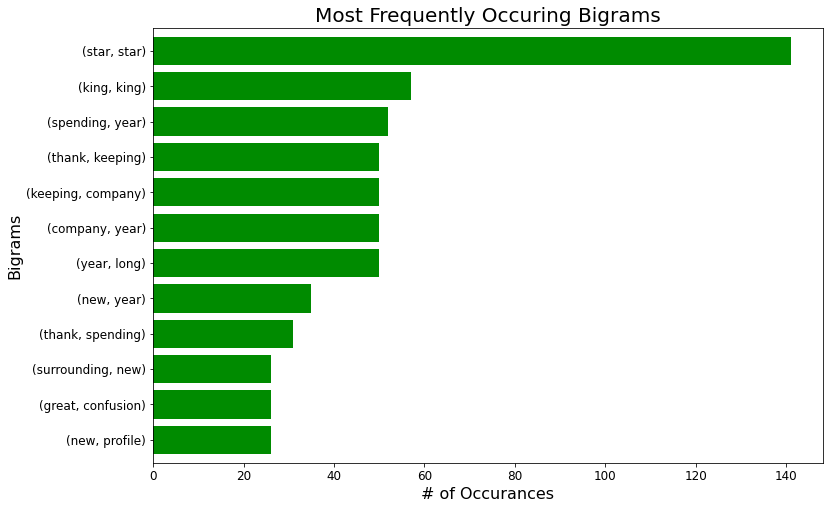

In [ ]:
pos_bigrams_series.sort_values().plot.barh(color='#008B00', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

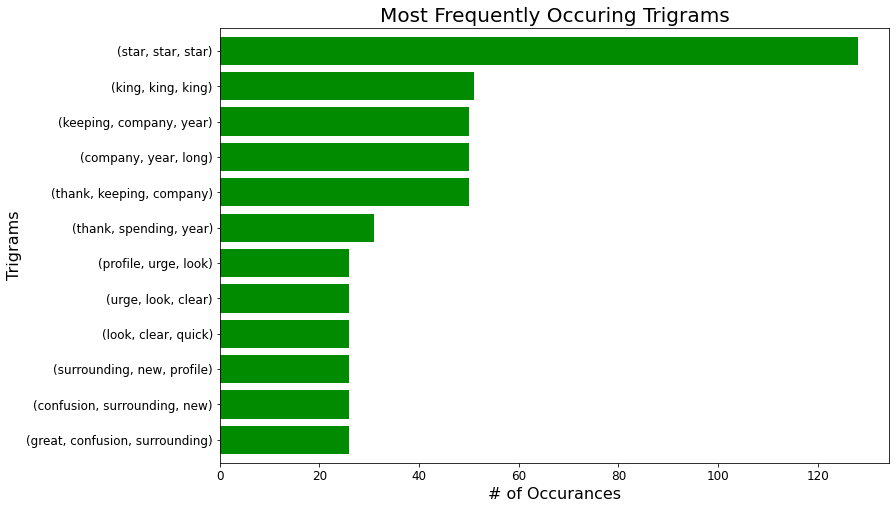

In [ ]:
pos_trigrams_series.sort_values().plot.barh(color='#008B00', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

**Negative Tweets**

In [ ]:
Neg_words = basic_clean(''.join(str(neg_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Neg_words, 2)).value_counts())[:10]

(lost, music)           413
(lost, official)        413
(music, illegal)        413
(illegal, address)      413
(address, copyright)    413
(song, lost)            413
(copyright, issue)      413
(unreleased, song)      413
(issue, consider)       413
(consider, lost)        413
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Neg_words, 3)).value_counts())[:10]

(music, illegal, address)        413
(lost, music, illegal)           413
(consider, lost, official)       413
(issue, consider, lost)          413
(unreleased, song, lost)         413
(song, lost, music)              413
(copyright, issue, consider)     413
(address, copyright, issue)      413
(illegal, address, copyright)    413
(lost, official, unreleased)     387
dtype: int64

In [ ]:
neg_bigrams_series = (pd.Series(nltk.ngrams(Neg_words, 2)).value_counts())[:12]
neg_trigrams_series = (pd.Series(nltk.ngrams(Neg_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

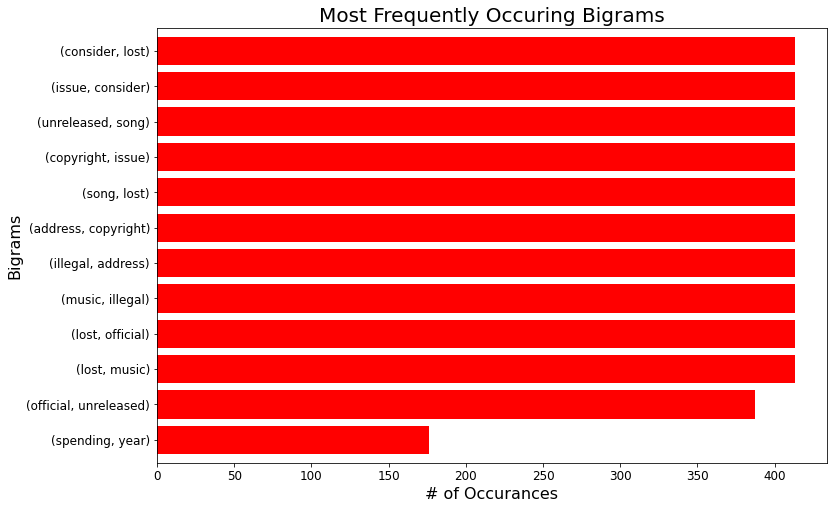

In [ ]:
neg_bigrams_series.sort_values().plot.barh(color='#FF0000', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

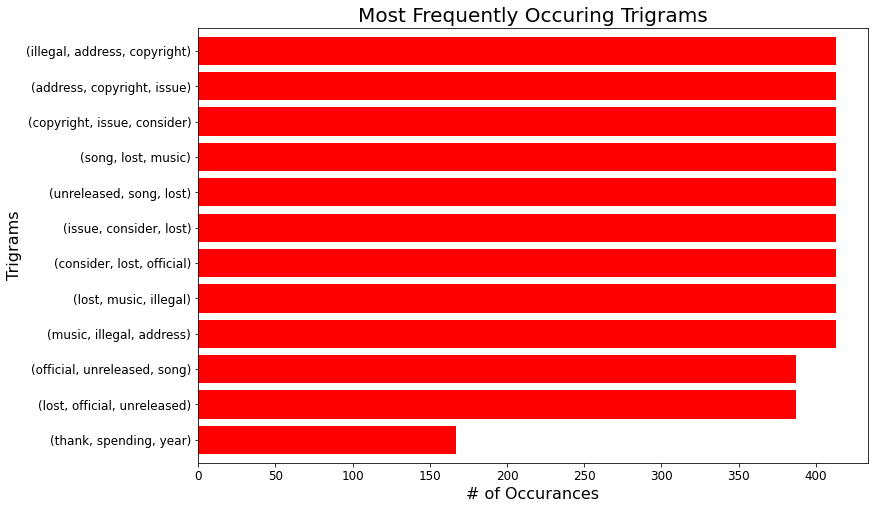

In [ ]:
neg_trigrams_series.sort_values().plot.barh(color='#FF0000', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

**Neutral Tweets**

In [ ]:
Neu_words = basic_clean(''.join(str(neu_tweets['Cleaned_tweet'].tolist())))

In [ ]:
(pd.Series(nltk.ngrams(Neu_words, 2)).value_counts())[:10]

(unreleased, song)         247
(copyright, issue)         246
(address, copyright)       246
(issue, sign)              245
(robe, unreleased)         245
(music, illegitimate)      245
(illegitimate, address)    245
(sign, official)           245
(sign, music)              242
(song, sign)               242
dtype: int64

In [ ]:
(pd.Series(nltk.ngrams(Neu_words, 3)).value_counts())[:10]

(address, copyright, issue)           246
(copyright, issue, sign)              245
(music, illegitimate, address)        245
(issue, sign, official)               245
(illegitimate, address, copyright)    245
(robe, unreleased, song)              245
(unreleased, song, sign)              242
(song, sign, music)                   242
(sign, music, illegitimate)           242
(official, robe, unreleased)          187
dtype: int64

In [ ]:
neu_bigrams_series = (pd.Series(nltk.ngrams(Neu_words, 2)).value_counts())[:12]
neu_trigrams_series = (pd.Series(nltk.ngrams(Neu_words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

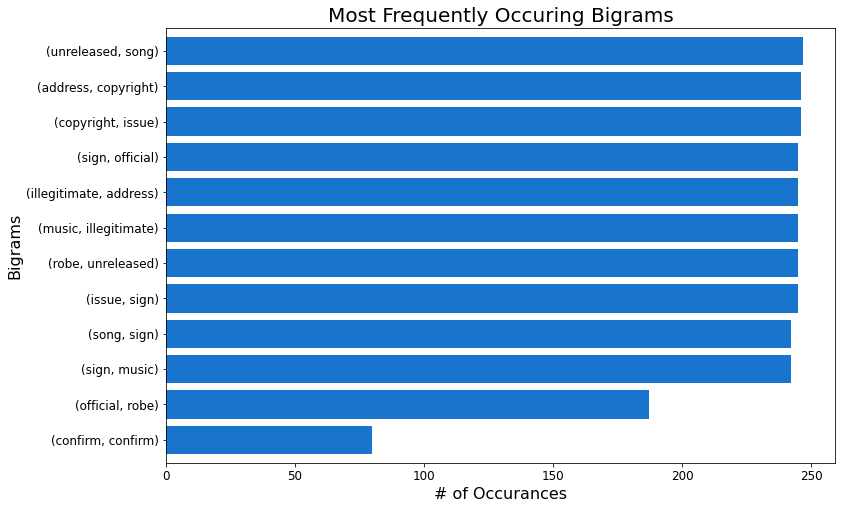

In [ ]:
neu_bigrams_series.sort_values().plot.barh(color='#1874CD', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Bigrams',fontsize=20)
plt.ylabel('Bigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

Text(0.5, 0, '# of Occurances')

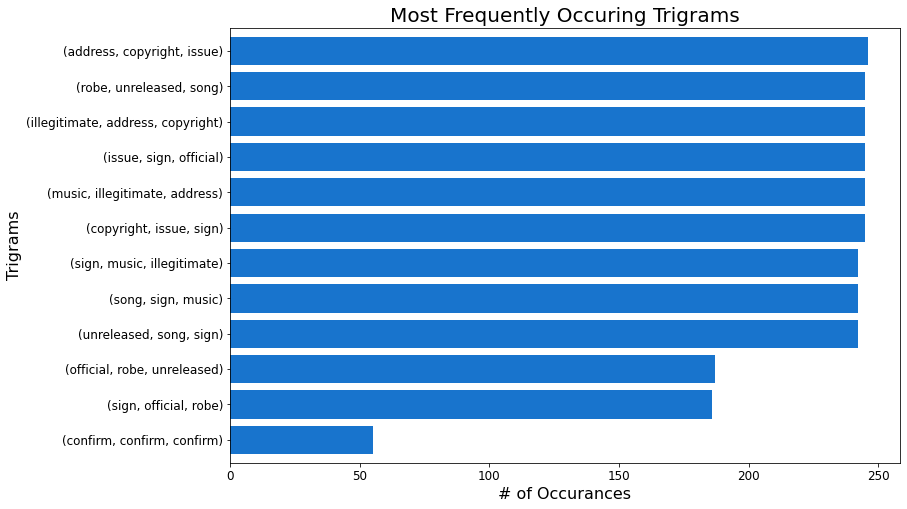

In [ ]:
neu_trigrams_series.sort_values().plot.barh(color='#1874CD', width=.8, figsize=(12, 8),fontsize=12)
plt.title('Most Frequently Occuring Trigrams',fontsize=20)
plt.ylabel('Trigrams',fontsize=16)
plt.xlabel('# of Occurances',fontsize=16)

# **Sentiment Analysis**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

Spotify["POS tagged"] = Spotify['Cleaned_tweet'].apply(token_stop_pos)
Spotify.head()

,State,Message,Sentiment,Cleaned_tweet,Tweets_Adjectives,POS tagged
0,Delhi,"whenever i’m at my lowest, i listen to this so...",NEUTRAL,whenever listen song random put sad still tran...,song sad,"[(whenever, r), (listen, v), (song, a), (rando..."
1,Punjab,@bhawmik @mahabharatAudio Have become great fa...,POSITIVE,become great fan voice story telling magic man...,great fan magic many,"[(become, r), (great, a), (fan, a), (voice, n)..."
2,Jammu and Kashmir,yeaaahh let's keep this energy my time 200k,NEUTRAL,let keep energy time,,"[(let, v), (keep, v), (energy, n), (time, n)]"
3,Karnataka,@KhokhraShrey If you send me YT link & I use s...,NEUTRAL,send link use vice smoothen,,"[(send, n), (link, n), (use, n), (vice, n), (s..."
4,Delhi,Turned a blind eye on Youtube music all this w...,NEUTRAL,turned blind eye music admit suggestion game t...,top,"[(turned, v), (blind, None), (eye, n), (music,..."


In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
      if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
      else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

Spotify["Lemmatised"] = Spotify['POS tagged'].apply(lemmatize)
Spotify.head()

,State,Message,Sentiment,Cleaned_tweet,Tweets_Adjectives,POS tagged,Lemmatised
0,Delhi,"whenever i’m at my lowest, i listen to this so...",NEUTRAL,whenever listen song random put sad still tran...,song sad,"[(whenever, r), (listen, v), (song, a), (rando...",whenever listen song random put sad still tr...
1,Punjab,@bhawmik @mahabharatAudio Have become great fa...,POSITIVE,become great fan voice story telling magic man...,great fan magic many,"[(become, r), (great, a), (fan, a), (voice, n)...",become great fan voice story tell magic many...
2,Jammu and Kashmir,yeaaahh let's keep this energy my time 200k,NEUTRAL,let keep energy time,,"[(let, v), (keep, v), (energy, n), (time, n)]",let keep energy time
3,Karnataka,@KhokhraShrey If you send me YT link & I use s...,NEUTRAL,send link use vice smoothen,,"[(send, n), (link, n), (use, n), (vice, n), (s...",send link use vice smoothen
4,Delhi,Turned a blind eye on Youtube music all this w...,NEUTRAL,turned blind eye music admit suggestion game t...,top,"[(turned, v), (blind, None), (eye, n), (music,...",turn blind eye music admit suggestion game t...


## **Text blob**

In [ ]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [ ]:
spotify_data = pd.DataFrame(Spotify[['Cleaned_tweet', 'Lemmatised']])

In [ ]:
spotify_data["Polarity"] = spotify_data['Lemmatised'].apply(getPolarity) 
spotify_data["Analysis"] = spotify_data['Polarity'].apply(analysis)
spotify_data.head()

,Cleaned_tweet,Lemmatised,Polarity,Analysis
0,whenever listen song random put sad still tran...,whenever listen song random put sad still tr...,-0.500000,Negative
1,become great fan voice story telling magic man...,become great fan voice story tell magic many...,0.500000,Positive
2,let keep energy time,let keep energy time,0.000000,Neutral
3,send link use vice smoothen,send link use vice smoothen,0.000000,Neutral
4,turned blind eye music admit suggestion game t...,turn blind eye music admit suggestion game t...,-0.133333,Negative


In [ ]:
Textblob_counts = spotify_data.Analysis.value_counts()
Textblob_counts

Neutral     5090
Positive    2821
Negative    1173
Name: Analysis, dtype: int64

## **VADER**

In [ ]:
pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
spotify_data["Vader Sentiment"] = spotify_data['Lemmatised'].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
spotify_data["Vader Analysis"] = spotify_data['Vader Sentiment'].apply(vader_analysis)
spotify_data.head()

,Cleaned_tweet,Lemmatised,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,whenever listen song random put sad still tran...,whenever listen song random put sad still tr...,-0.500000,Negative,-0.4404,Neutral
1,become great fan voice story telling magic man...,become great fan voice story tell magic many...,0.500000,Positive,0.8519,Positive
2,let keep energy time,let keep energy time,0.000000,Neutral,0.2732,Neutral
3,send link use vice smoothen,send link use vice smoothen,0.000000,Neutral,0.0000,Neutral
4,turned blind eye music admit suggestion game t...,turn blind eye music admit suggestion game t...,-0.133333,Negative,-0.0258,Neutral


In [ ]:
vader_counts = spotify_data['Vader Analysis'].value_counts()
vader_counts

Neutral     6968
Positive    1510
Negative     606
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fbae7c68750>,
 [Text(-0.8183750476434211, 0.735025361055405, 'Neutral'),
  Text(0.6475481928714839, -0.8892026416452415, 'Positive'),
  Text(1.3204604045755752, -0.2808635254854356, 'Negative')],
 [Text(-0.44638638962368415, 0.40092292421203907, '76.7%'),
  Text(0.3532081052026275, -0.4850196227155862, '16.6%'),
  Text(0.8314009954735104, -0.17683999752786686, '6.7%')])

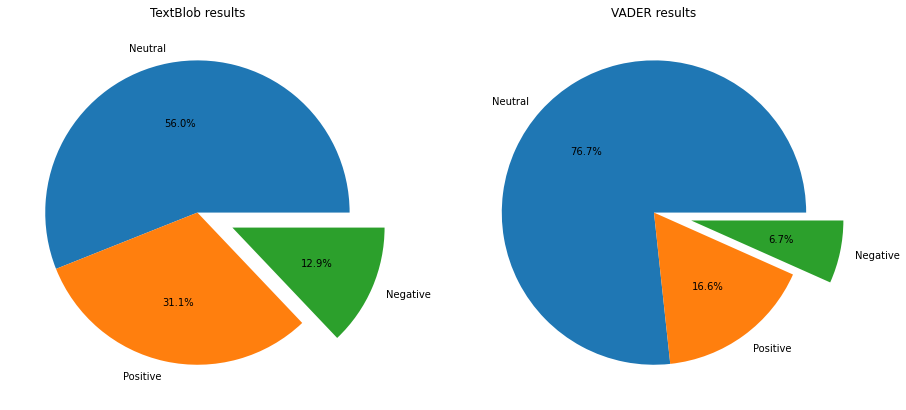

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("TextBlob results")
plt.pie(Textblob_counts.values, labels = Textblob_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,2,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)